## Definition

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models
with associated learning algorithms that analyze data used for classification and regression analysis.However, it is mostly used in classifition problems. 


<img src="svm.png"  alt="SVM" title="SVM"/>



SVM contains different kinds of kernels they are<br>
1.Linear kernel : Linear Kernel is used to separate the datapoints using a single Line.Training a SVM with a Linear Kernel is Faster than with any other Kernel.<br>
2.Polynomial kernel : It represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models.<br>
3.Radial Bases Function (RBF) / Gaussian kernel : It is a function whose value depends on the distance from the origin or from some point.<br>

# Iris Data set

## Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). 


## Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica



In [1]:
#importing the required libraries
import numpy as np # For numerical computations
import pandas as pd # For reading files
import matplotlib.pyplot as plt # For visualization
%matplotlib inline
import seaborn as sns
import warnings # to silence warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Iris dataset
data=pd.read_csv("D:\\ML_Datasets\\Iris\\iris.csv")

In [3]:
#Preview the data
data.head()

,sepal_length,sepal_width,petal_length,petal_width,iris
0,5.1,3.5,1.4,0.2,Iris_setosa
1,4.9,3.0,1.4,0.2,Iris_setosa
2,4.7,3.2,1.3,0.2,Iris_setosa
3,4.6,3.1,1.5,0.2,Iris_setosa
4,5.0,3.6,1.4,0.2,Iris_setosa


In [4]:
#findout unique classification/type of iris flower.
data.iris.unique()
#findout no of rows for each Species.
print(data.groupby('iris').size())


iris
Iris_setosa        50
Iris_versicolor    50
Iris_virginica     50
dtype: int64


In [5]:
#Create 3 DataFrame for each Species
setosa=data[data['iris']=='Iris_setosa']
versicolor =data[data['iris']=='Iris_versicolor']
virginica =data[data['iris']=='Iris_virginica']


### Plotting the dataset 

<Figure size 432x288 with 0 Axes>

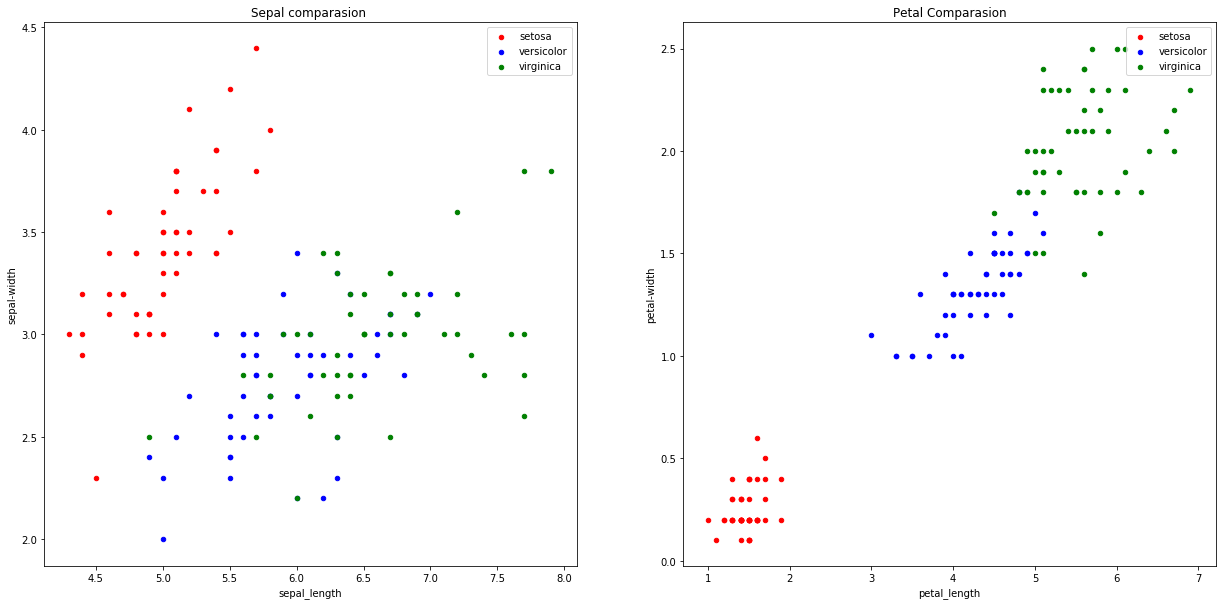

In [6]:
#for each Species ,let's check what is petal and sepal distibutuon
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(21, 10))

setosa.plot(x="sepal_length", y="sepal_width", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="sepal_length",y="sepal_width",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="sepal_length", y="sepal_width", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="petal_length", y="petal_width", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="petal_length",y="petal_width",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="petal_length", y="petal_width", kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()
#setosa   - setosa Petal are relatively smaller than rest of species .can be easily separable from rest of Species 
#versicolor & virginica are also separable in Petal comprasion
#setoa sepal are smallest in length and largest in Width than other species



#### converting the categorical data in the last column into numerical values using replace function


In [23]:
# replaced iris_setosa as 0,Iris_versicolor as 1 and Iris_virginica as 2
data=data.replace(to_replace ="Iris_setosa",value =0) 
data=data.replace(to_replace ="Iris_versicolor",value =1) 
data=data.replace(to_replace ="Iris_virginica",value =2) 

In [8]:
data.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,iris
2,4.7,3.2,1.3,0.2,0
38,4.4,3.0,1.3,0.2,0
8,4.4,2.9,1.4,0.2,0


## Exploratory Data Analysis

In [9]:
#Shape of the data ie,. no of rows and columns 
data.shape


(150, 5)

In [10]:
#data information i.e datatypes of different columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
iris            150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [11]:
#description of the data
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,iris
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
#checking missing values in the data
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
iris            0
dtype: int64

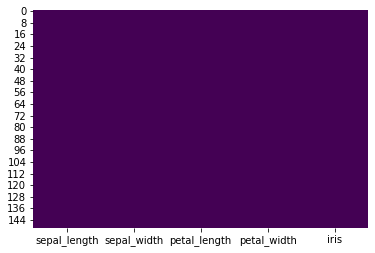

In [13]:
sns.heatmap(data.isnull(),cbar=False,cmap="viridis")

There is no missing values in data

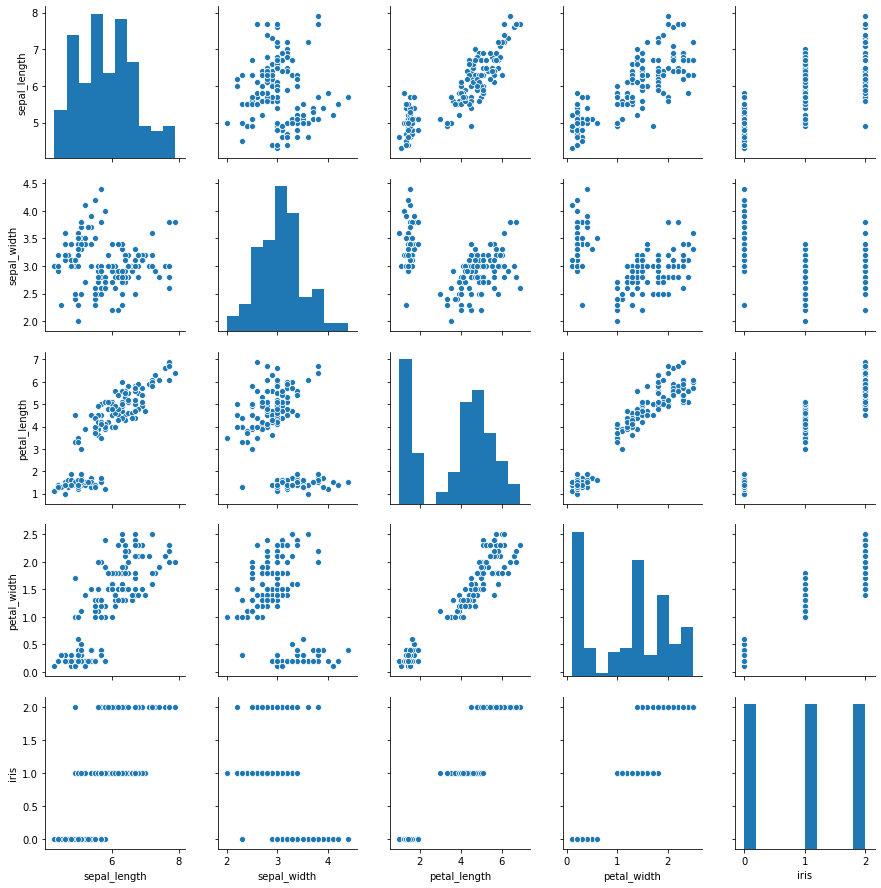

In [14]:
# It Takes more time to run can avoid this code if considered unnecessary. 
sns.pairplot(data)

Text(0.5, 1, 'Heatmap')

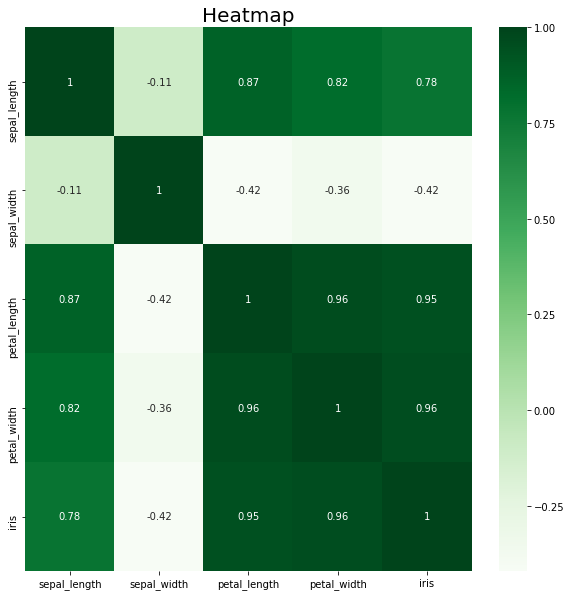

In [15]:
corr=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Greens")
plt.title('Heatmap', fontsize=20)

#### Spliting X and Y variables

In [16]:
#split the dataset into X and Y variables
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
# A sample of X and Y variables
print(X.head(2))
print(Y.head(2))

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
0    0
1    0
Name: iris, dtype: int64


### Training and Testing the dataset

In [17]:
#Spliting the dataset into training and testing for training 70 percent data testing 30 percent data#
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

In [18]:
# Shape of training and testing data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


#### Fitting the model using Linear Kernel and Polynomial Kernel

In [19]:
#Importing packages for fitting the model to the data
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
kernels=[SVC(kernel="linear"),
       SVC(kernel="poly")]
kernel_names=['Linear','Polynomial']
acc=[]
for model in range(len(kernels)):
    svclassifier=kernels[model]
    clf=svclassifier.fit(X_train,Y_train)
    Y_pred=svclassifier.predict(X_test)
    acc.append(accuracy_score(Y_test,Y_pred))
    print("confusion matrix of:",kernel_names[model],"\n",confusion_matrix(Y_test,Y_pred))  
d={'Modelling Algorithm':kernel_names,'Accuracy':acc}
acc_table=pd.DataFrame(d)
acc_table


confusion matrix of: Linear 
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
confusion matrix of: Polynomial 
 [[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]


,Modelling Algorithm,Accuracy
0,Linear,0.977778
1,Polynomial,0.955556


In [20]:
# Finding 10 fold cross validation scores for the model using 'for' loop 
from sklearn.model_selection import cross_val_score
kernels=[SVC(kernel="linear"),
       SVC(kernel="poly")]
kernel_names=['Linear','Polynomial']
cvs=[]
for model in range(len(kernels)):
    svclassifier=kernels[model]
    clf=svclassifier.fit(X_train,Y_train)
    scores = cross_val_score(clf, X_test, Y_test, cv=10)
    scores.mean()
    print("10 fold cross validation of:",kernel_names[model],"\n",scores.mean())  


10 fold cross validation of: Linear 
 0.9550000000000001
10 fold cross validation of: Polynomial 
 0.9183333333333333


#### Making Predictions 

In [21]:
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [22]:
new_obs=[[5.1,3.5,1.4,0.2]]
pv=[]
for model in range(len(kernels)):
    svclassifier=kernels[model]
    kernels[model].predict(new_obs)
    pv.append(kernels[model].predict(new_obs))
    
d={'Modelling Algorithm':kernel_names,'Predicted value':pv}
pred_table=pd.DataFrame(d)
pred_table

,Modelling Algorithm,Predicted value
0,Linear,[0]
1,Polynomial,[0]


#### Conclusion

From the above Support Vector Machine(SVM) algorithm with linear and polynomial kernels predicted correctly.